In [1]:
from notebook_util import *
%matplotlib inline

In [2]:
from minee.data.mix_gaussian import MixedGaussian

- It is better to use `sample_size` instead of `n_sample`.
- Use the default `tensor` instead of `FloatTensor`. 

In [5]:
np.random.seed(0)
sample_size = 200
rho1 = 0.9
data = MixedGaussian(sample_size=sample_size,rho1=rho1).data
data_t = torch.Tensor(data)

Separate X data and Y data for the estimation. This should be a preprocessing done before instead of after feeding the data to the model.

In [6]:
X = data[:,[0]]
Y = data[:,[1]]

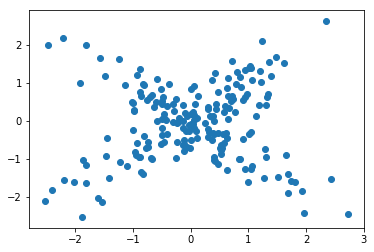

In [7]:
plt.scatter(X,Y)

Generate the reference samples by resampling.

In [8]:
X_ref = resample(X,batch_size=sample_size)
Y_ref = resample(Y,batch_size=sample_size)

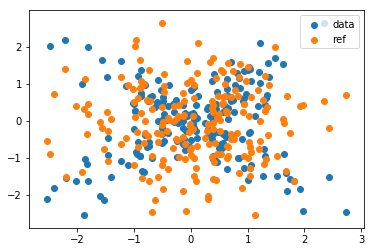

In [9]:
plt.scatter(X,Y,label="data")
plt.scatter(X_ref,Y_ref,label="ref")
plt.legend()

In [10]:
XY_t = torch.Tensor(np.concatenate((X,Y),axis=1))

In [11]:
XY_ref_t = torch.Tensor(np.concatenate((X_ref,Y_ref),axis=1))

In [12]:
batch_size = int(sample_size*1)
net_list = []
mi_lb_list = []
batch_mi_lb_list = []
batch_loss_list = []
ma_rate = 0.1
ma_ef = 1
lr = 1e-3
XY_net = Net(input_size=X.shape[1]+Y.shape[1])
optimizer = optim.Adam(XY_net.parameters(),lr=lr)

Automatically load previous results from db file if exists

In [16]:
fname = 'mix_gaussian_full_batch_ma.db'
# if os.path.exists(fname):
#     with open(fname,'rb') as f:
#         net_list,mi_lb_list,batch_loss_list,batch_mi_lb_list,ma_ef = dill.load(f)
#         XY_net.load_state_dict(net_list[-1])
#         print('results loaded from '+fname)

Repeately run the following to continue to train

In [22]:
for j in range(50):
    for i in range(1000):
        optimizer.zero_grad()
        batch_XY = resample(XY_t,batch_size=batch_size)
        #batch_XY_ref = resample(XY_ref_t,batch_size=batch_size)
        batch_XY_ref = torch.Tensor(np.concatenate((resample(X,batch_size=batch_size), \
                                                    resample(Y,batch_size=batch_size)),axis=1))
        fXY = XY_net(batch_XY)
        efXY_ref = torch.exp(XY_net(batch_XY_ref))
        batch_mi_lb = torch.mean(fXY) - torch.log(torch.mean(efXY_ref))
        #loss = -batch_mi_lb
        ma_ef = (1-ma_rate)*ma_ef + ma_rate*torch.mean(efXY_ref)
        batch_loss = -(torch.mean(fXY) - (1/ma_ef.mean()).detach()*torch.mean(efXY_ref))
        batch_loss.backward()
        optimizer.step()    
        mi_lb_list = np.append(mi_lb_list, \
                                (torch.mean(XY_net(XY_t)) \
                                 - torch.log(torch.mean(torch.exp(XY_net(XY_ref_t))))).cpu().item())
        batch_mi_lb_list = np.append(batch_mi_lb_list,batch_mi_lb.cpu().item())
        batch_loss_list = np.append(batch_loss_list,batch_loss.cpu().item())
    net_list = np.append(net_list,XY_net.state_dict())
    # save existing work
    with open(str(j)+fname,'wb') as f:
        dill.dump([net_list,mi_lb_list,batch_loss_list,batch_mi_lb_list,ma_ef],f)
        print('results saved: '+str(j))

tensor(58.9684, grad_fn=<AddBackward0>)
tensor(59.4770, grad_fn=<AddBackward0>)
tensor(59.5655, grad_fn=<AddBackward0>)
tensor(59.2676, grad_fn=<AddBackward0>)
tensor(59.1431, grad_fn=<AddBackward0>)
tensor(58.3465, grad_fn=<AddBackward0>)
tensor(58.8931, grad_fn=<AddBackward0>)
tensor(59.5953, grad_fn=<AddBackward0>)
tensor(58.9923, grad_fn=<AddBackward0>)
tensor(58.5792, grad_fn=<AddBackward0>)
tensor(58.4311, grad_fn=<AddBackward0>)
tensor(57.8159, grad_fn=<AddBackward0>)
tensor(58.2989, grad_fn=<AddBackward0>)
tensor(57.4056, grad_fn=<AddBackward0>)
tensor(58.2254, grad_fn=<AddBackward0>)
tensor(56.8567, grad_fn=<AddBackward0>)
tensor(56.6672, grad_fn=<AddBackward0>)
tensor(56.8451, grad_fn=<AddBackward0>)
tensor(57.1937, grad_fn=<AddBackward0>)
tensor(58.8560, grad_fn=<AddBackward0>)
tensor(58.6118, grad_fn=<AddBackward0>)
tensor(58.0128, grad_fn=<AddBackward0>)
tensor(57.7894, grad_fn=<AddBackward0>)
tensor(58.8969, grad_fn=<AddBackward0>)
tensor(59.4010, grad_fn=<AddBackward0>)


tensor(59.5588, grad_fn=<AddBackward0>)
tensor(59.7757, grad_fn=<AddBackward0>)
tensor(59.4540, grad_fn=<AddBackward0>)
tensor(58.3139, grad_fn=<AddBackward0>)
tensor(57.9744, grad_fn=<AddBackward0>)
tensor(57.3658, grad_fn=<AddBackward0>)
tensor(57.5764, grad_fn=<AddBackward0>)
tensor(57.1095, grad_fn=<AddBackward0>)
tensor(58.4576, grad_fn=<AddBackward0>)
tensor(58.6896, grad_fn=<AddBackward0>)
tensor(58.1395, grad_fn=<AddBackward0>)
tensor(58.3017, grad_fn=<AddBackward0>)
tensor(57.8072, grad_fn=<AddBackward0>)
tensor(58.6695, grad_fn=<AddBackward0>)
tensor(57.8739, grad_fn=<AddBackward0>)
tensor(58.0535, grad_fn=<AddBackward0>)
tensor(58.1586, grad_fn=<AddBackward0>)
tensor(58.3232, grad_fn=<AddBackward0>)
tensor(58.7391, grad_fn=<AddBackward0>)
tensor(58.6599, grad_fn=<AddBackward0>)
tensor(57.4339, grad_fn=<AddBackward0>)
tensor(57.3540, grad_fn=<AddBackward0>)
tensor(57.1026, grad_fn=<AddBackward0>)
tensor(56.4089, grad_fn=<AddBackward0>)
tensor(57.0991, grad_fn=<AddBackward0>)


tensor(60.1739, grad_fn=<AddBackward0>)
tensor(60.4259, grad_fn=<AddBackward0>)
tensor(59.9807, grad_fn=<AddBackward0>)
tensor(60.0131, grad_fn=<AddBackward0>)
tensor(60.6559, grad_fn=<AddBackward0>)
tensor(59.9820, grad_fn=<AddBackward0>)
tensor(58.7187, grad_fn=<AddBackward0>)
tensor(59.6483, grad_fn=<AddBackward0>)
tensor(59.9824, grad_fn=<AddBackward0>)
tensor(59.7422, grad_fn=<AddBackward0>)
tensor(60.2149, grad_fn=<AddBackward0>)
tensor(61.2179, grad_fn=<AddBackward0>)
tensor(60.9889, grad_fn=<AddBackward0>)
tensor(60.5099, grad_fn=<AddBackward0>)
tensor(59.5263, grad_fn=<AddBackward0>)
tensor(59.4943, grad_fn=<AddBackward0>)
tensor(58.8068, grad_fn=<AddBackward0>)
tensor(57.8476, grad_fn=<AddBackward0>)
tensor(57.1984, grad_fn=<AddBackward0>)
tensor(58.4671, grad_fn=<AddBackward0>)
tensor(61.3930, grad_fn=<AddBackward0>)
tensor(60.9083, grad_fn=<AddBackward0>)
tensor(60.6972, grad_fn=<AddBackward0>)
tensor(59.3199, grad_fn=<AddBackward0>)
tensor(58.6893, grad_fn=<AddBackward0>)


tensor(61.8740, grad_fn=<AddBackward0>)
tensor(62.2785, grad_fn=<AddBackward0>)
tensor(62.0898, grad_fn=<AddBackward0>)
tensor(63.7202, grad_fn=<AddBackward0>)
tensor(64.0883, grad_fn=<AddBackward0>)
tensor(63.0021, grad_fn=<AddBackward0>)
tensor(63.0761, grad_fn=<AddBackward0>)
tensor(61.9826, grad_fn=<AddBackward0>)
tensor(60.8393, grad_fn=<AddBackward0>)
tensor(60.1201, grad_fn=<AddBackward0>)
tensor(60.1200, grad_fn=<AddBackward0>)
tensor(60.1710, grad_fn=<AddBackward0>)
tensor(61.6267, grad_fn=<AddBackward0>)
tensor(62.2304, grad_fn=<AddBackward0>)
tensor(62.2605, grad_fn=<AddBackward0>)
tensor(63.2202, grad_fn=<AddBackward0>)
tensor(62.7863, grad_fn=<AddBackward0>)
tensor(62.1644, grad_fn=<AddBackward0>)
tensor(61.5320, grad_fn=<AddBackward0>)
tensor(61.2800, grad_fn=<AddBackward0>)
tensor(60.8396, grad_fn=<AddBackward0>)
tensor(61.4369, grad_fn=<AddBackward0>)
tensor(61.0913, grad_fn=<AddBackward0>)
tensor(60.3232, grad_fn=<AddBackward0>)
tensor(60.6473, grad_fn=<AddBackward0>)


tensor(60.4379, grad_fn=<AddBackward0>)
tensor(61.4655, grad_fn=<AddBackward0>)
tensor(62.1015, grad_fn=<AddBackward0>)
tensor(62.6471, grad_fn=<AddBackward0>)
tensor(61.6721, grad_fn=<AddBackward0>)
tensor(61.3220, grad_fn=<AddBackward0>)
tensor(60.9923, grad_fn=<AddBackward0>)
tensor(60.7130, grad_fn=<AddBackward0>)
tensor(59.8024, grad_fn=<AddBackward0>)
tensor(60.5713, grad_fn=<AddBackward0>)
tensor(61.3794, grad_fn=<AddBackward0>)
tensor(61.4010, grad_fn=<AddBackward0>)
tensor(60.3279, grad_fn=<AddBackward0>)
tensor(60.2960, grad_fn=<AddBackward0>)
tensor(60.6870, grad_fn=<AddBackward0>)
tensor(61.2000, grad_fn=<AddBackward0>)
tensor(62.9541, grad_fn=<AddBackward0>)
tensor(61.7218, grad_fn=<AddBackward0>)
tensor(61.5715, grad_fn=<AddBackward0>)
tensor(61.1425, grad_fn=<AddBackward0>)
tensor(60.4731, grad_fn=<AddBackward0>)
tensor(59.9088, grad_fn=<AddBackward0>)
tensor(59.4395, grad_fn=<AddBackward0>)
tensor(59.5060, grad_fn=<AddBackward0>)
tensor(59.6579, grad_fn=<AddBackward0>)


KeyboardInterrupt: 

To save new results to a db file using the following code, delete the existing db file.

In [20]:
if not os.path.exists(fname):
    with open(fname,'wb') as f:
        dill.dump([net_list,mi_lb_list,batch_loss_list,batch_mi_lb_list,ma_ef],f)
        print('results saved to '+fname)

results saved to mix_gaussian_full_batch_ma.db


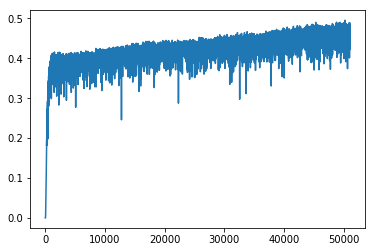

In [19]:
plt.plot(mi_lb_list)

In [ ]:
plot_net(XY_net)

In [ ]:
t=50000
plt.plot(-batch_mi_lb_list[:t],label="-batch mi lb")
plt.plot(batch_loss_list[:t],label="batch loss")
plt.legend()